In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

,Extent,Date
0,1107873.946,1979-01-01
1,1211101.473,1979-02-01
2,1215128.770,1979-03-01
3,1233940.811,1979-04-01
4,1193061.566,1979-05-01
...,...,...
533,124025.343,2023-06-01
534,53107.426,2023-07-01
535,11242.827,2023-08-01
536,3272.024,2023-09-01


In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 11
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Barents['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((516, 12, 1), (516,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Barents_model_LT11/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
46/53 [=========================>....] - ETA: 0s - loss: 0.2070 - root_mean_squared_error: 0.4550

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 9s 105ms/step - loss: 0.2113 - root_mean_squared_error: 0.4597 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2489
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.1344 - root_mean_squared_error: 0.3666

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.1344 - root_mean_squared_error: 0.3666 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2248
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1030 - root_mean_squared_error: 0.3210

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.1013 - root_mean_squared_error: 0.3183 - val_loss: 0.0410 - val_root_mean_squared_error: 0.2026
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0823 - root_mean_squared_error: 0.2869

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0798 - root_mean_squared_error: 0.2825 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 5/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0624 - root_mean_squared_error: 0.2499

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0635 - root_mean_squared_error: 0.2520 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1698
Epoch 6/50
52/53 [============================>.] - ETA: 0s - loss: 0.0467 - root_mean_squared_error: 0.2162

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0464 - root_mean_squared_error: 0.2155 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1602
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0434 - root_mean_squared_error: 0.2083

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 6s 118ms/step - loss: 0.0427 - root_mean_squared_error: 0.2065 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1531
Epoch 8/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0318 - root_mean_squared_error: 0.1783

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 6s 106ms/step - loss: 0.0333 - root_mean_squared_error: 0.1824 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1469
Epoch 9/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0262 - root_mean_squared_error: 0.1620

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 6s 116ms/step - loss: 0.0270 - root_mean_squared_error: 0.1644 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1412
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1500

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 6s 107ms/step - loss: 0.0231 - root_mean_squared_error: 0.1520 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1350
Epoch 11/50
52/53 [============================>.] - ETA: 0s - loss: 0.0218 - root_mean_squared_error: 0.1478

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0218 - root_mean_squared_error: 0.1478 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1235
Epoch 12/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0219 - root_mean_squared_error: 0.1480

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0222 - root_mean_squared_error: 0.1489 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1147
Epoch 13/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1406

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1072
Epoch 14/50
41/53 [======================>.......] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1348

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0174 - root_mean_squared_error: 0.1321 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1054
Epoch 15/50
53/53 [==============================] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1350

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0182 - root_mean_squared_error: 0.1350 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884
Epoch 16/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0163 - root_mean_squared_error: 0.1275 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0990
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0177 - root_mean_squared_error: 0.1330 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0929
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0969
Epoch 19/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964
Epoch 20/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0172 - root_mean_squared_error: 0.1312

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 6s 114ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0874
Epoch 21/50
53/53 [==============================] - 1s 9ms/step - loss: 0.0178 - root_mean_squared_error: 0.1333 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0915
Epoch 22/50
53/53 [==============================] - 1s 10ms/step - loss: 0.0168 - root_mean_squared_error: 0.1295 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0943
Epoch 23/50
53/53 [==============================] - 1s 11ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0887
Epoch 24/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.1410

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 6s 108ms/step - loss: 0.0195 - root_mean_squared_error: 0.1397 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0945
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879
Epoch 27/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0182 - root_mean_squared_error: 0.1349 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 28/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0162 - root_mean_squared_error: 0.1272 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0903
Epoch 29/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0183 - root_mean_squared_error: 0.1351 - val_loss: 0.0089 - val_root_mean_square

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 6s 109ms/step - loss: 0.0166 - root_mean_squared_error: 0.1288 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 31/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885
Epoch 32/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1017
Epoch 33/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0199 - root_mean_squared_error: 0.1411 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899
Epoch 34/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0156 - root_mean_squared_error: 0.1247 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0860
Epoch 35/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0163 - root_mean_squared_error: 0.1278 - val_loss: 0.0074 - val_root_mean_square

INFO:tensorflow:Assets written to: Barents_model_LT11\assets


INFO:tensorflow:Assets written to: Barents_model_LT11\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0191 - root_mean_squared_error: 0.1384 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0846
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0928
Epoch 44/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0992
Epoch 45/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0205 - root_mean_squared_error: 0.1432 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871
Epoch 46/50
53/53 [==============================] - 1s 10ms/step - loss: 0.0161 - root_mean_squared_error: 0.1268 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 47/50
53/53 [==============================] - 1s 10ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 0.0073 - val_root_mean_squar

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9184229294459025 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

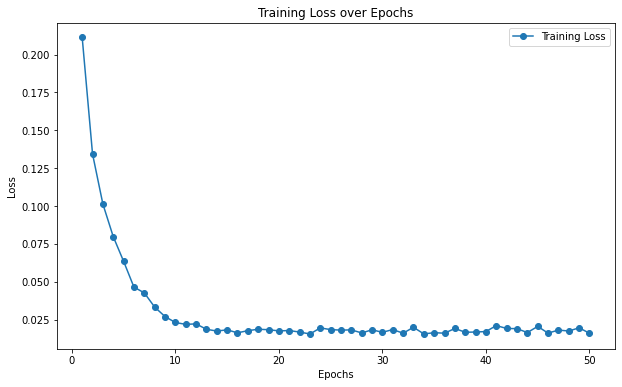

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

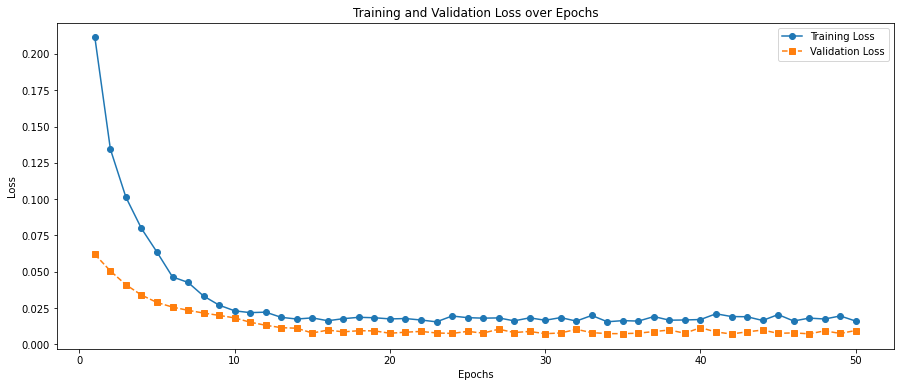

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model_LT11/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.0898542306134511
MAE : 0.07043381244191584


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,619052.562500,701143.910
1,545390.937500,657891.340
2,439100.156250,432215.421
3,276040.906250,201834.787
4,132559.125000,55041.511
5,-11139.500977,5387.468
6,-32705.308594,1576.813
7,56967.042969,21681.895
8,198626.468750,37772.681
9,408719.093750,239568.531


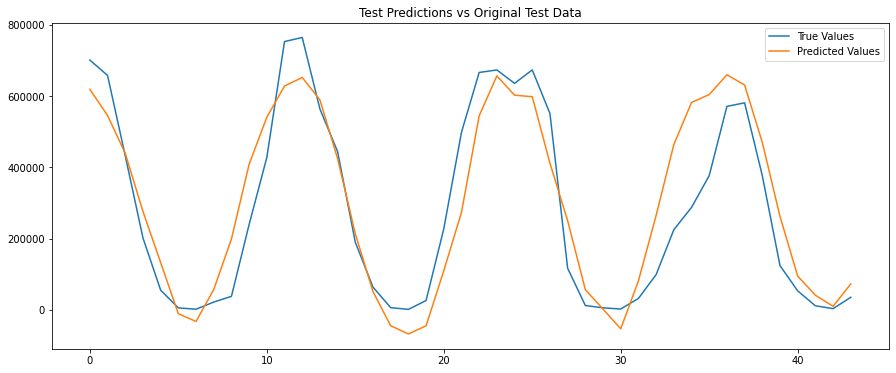

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

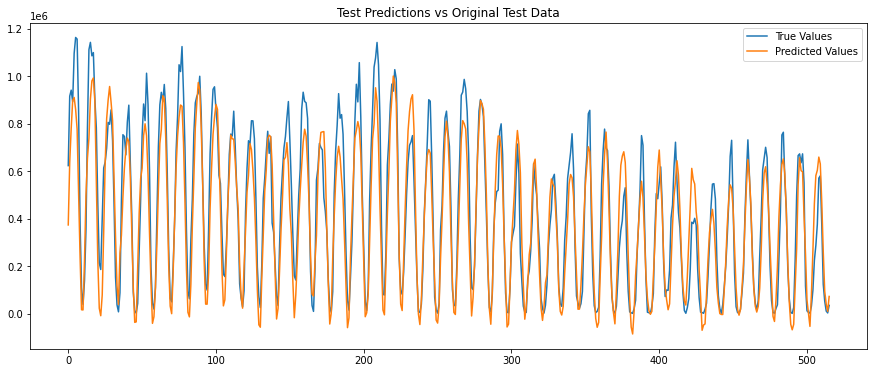

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()